### Computer Programming Course - Final Assignment

## Assignment Task

This assignment studies the social contagion of cheating in a massive multiplayer online game. The assignment tests the hypothesis that players who observe cheating become likely to adopt cheating themselves. To do so, we first count how many observers of cheaters become cheaters within a certain period of time. We call these **observer–cheater motifs**. We then simulate alternative universes in which the players played the same game but happened to be killed by someone else. Finally, we will compare how the count of the observer–cheater motifs observed in the actual data compares to what we would expect in a "randomized" world.

**NOTE: This assignment only allows fundamental Python data types (lists, tuples, dictionaries, etc.)**

### Data

The name for the data folder is `assignment-final-data`.

The two data files are as follows:

* `cheaters.txt` – contains cheaters who played between March 1 and March 10, 2019
    1. player account id
    * estimated date when the player started cheating
    * date when the player's account was banned due to cheating
    
* `kills.txt` – contains the killings done in 6,000 randomly selected matches played between March 1 and March 10, 2019
    1. match id 
    * account id of the killer
    * account id of the player who got killed
    * time when the attack (killing) happened

### Step 1. Observers of cheating start cheating

Cheating players can be recognized because they exhibit abnormal killing patterns. We will assume that player A realizes that cheating occurs if either:
1. cheating player B kills at least 3 other players before A gets killed in the game

or 

2. A is killed by cheating player B.

Count how many players observed at least one cheater and then started cheating within the next 5 days. We will assume here that we can only talk about a causal relationship if the two events (observing a cheater and starting to cheat) are relatively proximate in time (within 5 days of each other). In essence, we are looking for temporal motifs in which payer A observes B and then A becomes cheater, but the timing between the two events should not be more than 5 days.

### Step 2. Simulating an alternative universe

Of course, proximal in time does not necessarily mean causal. 

To establish causality, we will simulate an alternative world in which everything is the same but the events took somewhat different sequence. If observing cheating causes cheating, in the randomized world we will observe fewer observer–cheater motifs than in reality. To simulate an alternative universe, we will keep the timing and structure of interactions but randomly assign the identities of players. There are certain restrictions we need to observe, however: 

* Randomize within a game, not between games. 
* Since cheaters may tend to kill more or kill at a specific period in the game, we will preserve their position in the killing network. That is, only non-cheaters should be randomly reassigned. 

### Step 3. Evaluating reality against alternative universes 

Conduct 10 randomizations for the data. Then plot the number of observer–cheater motifs observed in the actual data (use a vertical line) compared to the distribution you get in the randomized data (use a histogram). What do you observe? What does this tell us? (Write 2-3 sentences to reflect on the answer. You will not be marked on what you write but wouldn't it be a waste to do all of this work and not even try to think about what the results mean?) 



## Import and run your code here

The number of actual observer-cheater motifs: 200

The number of observer-cheater motifs across 10 simulations: [212, 191, 220, 212, 217, 199, 187, 203, 201, 210]


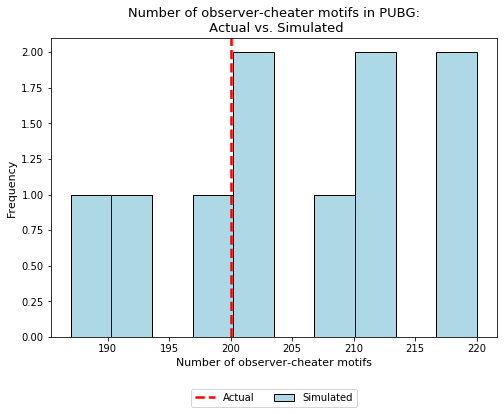

In [2]:
## Import modules to estimate and show results
from data_utils import *
from motif_utils import *
from simulation_utils import *
from evaluation_utils import *
# ensure plot appears
%matplotlib inline

## Load data from date_tools 
pubg_cheaters = get_data('../assignment-final-data/cheaters.txt')
pubg_kills = get_data('../assignment-final-data/kills.txt')

## Format dates from date_tools
# (Note: cheater date values do not have time provided
# in data, so times are assigned to be 00:00)
for cheater in pubg_cheaters:
    cheater[1] = str_to_datetime(cheater[1], from_format = 'date')
    cheater[2] = str_to_datetime(cheater[2], from_format = 'date')

for kill in pubg_kills:
    kill[3] = str_to_datetime(kill[3], from_format = 'datetime')

    
## Step 1: Count observer-cheaters motifs using motif_tools
pubg_actual_motif_count = count_motifs(pubg_cheaters, pubg_kills)
print("The number of actual observer-cheater motifs:", pubg_actual_motif_count)


## Step 2: Simulate an alternate universe using simulation_tools
pubg_simulated_motif_counts = run_simulations(pubg_cheaters, pubg_kills, 10)
print("\nThe number of observer-cheater motifs across 10 simulations:",\
      pubg_simulated_motif_counts)


## Step 3: Evaluate reality against 10 alternate universes:
## Plot comparison using evaluation_tools
evaluation_plot(pubg_actual_motif_count, pubg_simulated_motif_counts)

**Brief Analysis:**
From the above analysis, we can see that the number of actual observer-cheater motifs in the data is 200. The number of motifs across the 10 simulated universes is distributed around this number, i.e., the number of motifs in the simulated world is **not** significantly fewer. This means that the results cannot clearly establish causality (between observing cheating and cheating). 

In order to determine causal links, there should possibly be a larger sample size of simulations to test and perhaps formal statistical tests. From this analysis alone, it is not apparent that it is the case that observing cheating causes cheating.